In [102]:
#data wrangling
import pandas as pd
#datetime
import datetime as dt
#seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
# load sheet Transactions trong file KPMG và in ra 5 dòng đầu tiên
transactions = pd.read_excel('/Users/lyly/Downloads/KPMG_Milestone_Project/KPMG/KPMG.xlsx')
print(transactions.head(5))

   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  
0       71.49          53.62        

In [104]:
# in ra info bảng
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [105]:
# describe default
print(transactions.describe())

       transaction_id   product_id   customer_id  online_order    list_price  \
count    20000.000000  20000.00000  20000.000000  19640.000000  20000.000000   
mean     10000.500000     45.36465   1738.246050      0.500458   1107.829449   
std       5773.647028     30.75359   1011.951046      0.500013    582.825242   
min          1.000000      0.00000      1.000000      0.000000     12.010000   
25%       5000.750000     18.00000    857.750000      0.000000    575.270000   
50%      10000.500000     44.00000   1736.000000      1.000000   1163.890000   
75%      15000.250000     72.00000   2613.000000      1.000000   1635.300000   
max      20000.000000    100.00000   5034.000000      1.000000   2091.470000   

       standard_cost  product_first_sold_date  
count   19803.000000             19803.000000  
mean      556.046951             38199.776549  
std       405.955660              2875.201110  
min         7.210000             33259.000000  
25%       215.140000             35667.

In [106]:
# describe các biến object
print(transactions.describe(include=object))

       order_status  brand product_line product_class product_size
count         20000  19803        19803         19803        19803
unique            2      6            4             3            3
top        Approved  Solex     Standard        medium       medium
freq          19821   4253        14176         13826        12990


In [107]:
# describe all
print(transactions.describe(include='all'))

        transaction_id   product_id   customer_id     transaction_date  \
count     20000.000000  20000.00000  20000.000000                20000   
unique             NaN          NaN           NaN                  364   
top                NaN          NaN           NaN  2017-02-14 00:00:00   
freq               NaN          NaN           NaN                   82   
first              NaN          NaN           NaN  2017-01-01 00:00:00   
last               NaN          NaN           NaN  2017-12-30 00:00:00   
mean      10000.500000     45.36465   1738.246050                  NaN   
std        5773.647028     30.75359   1011.951046                  NaN   
min           1.000000      0.00000      1.000000                  NaN   
25%        5000.750000     18.00000    857.750000                  NaN   
50%       10000.500000     44.00000   1736.000000                  NaN   
75%       15000.250000     72.00000   2613.000000                  NaN   
max       20000.000000    100.00000   

/var/folders/3k/g5jqmfjj5_v8sf98jsp5hpsr0000gn/T/ipykernel_44212/2773332739.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(transactions.describe(include='all'))


In [108]:
# count số dòng bị null ở mỗi cột
transactions.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

# 1. Data Correction

## 1.1 Drop NA

In [109]:
# tạo bảng df_dropna_all bằng cách loại bỏ tất cả giá trị null trong bảng và in ra info
df_dropna_all = transactions.dropna()
print(df_dropna_all.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [110]:
# tạo bảng df_dropna_online_order bằng cách loại bỏ giá trị null trong cột online_order và in ra info
df_dropna_online_order = transactions.dropna(subset='online_order')
print(df_dropna_online_order.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19640 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19640 non-null  int64         
 1   product_id               19640 non-null  int64         
 2   customer_id              19640 non-null  int64         
 3   transaction_date         19640 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             19640 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19640 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

## 1.2 Fill NA

In [111]:
# fill tất cả NA bằng 0, lưu vào bảng df_fillna_0 và in ra info
df_fillna_0 = transactions.fillna(0)
print(df_fillna_0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [112]:
# fill NA bằng ffill, lưu vào bảng df_fillna_ffill và in ra info
df_fillna_ffill = transactions.fillna(method='ffill')
print(df_fillna_ffill.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [113]:
# fill NA bằng bfill, lưu vào bảng df_fillna_bfill và in ra info
df_fillna_bfill = transactions.fillna(method='bfill')
print(df_fillna_bfill.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

## 1.3. Assess Categorical Data

In [114]:
# load sheet Demographic và hiển thị top head
demographic = pd.read_excel('/Users/lyly/Downloads/KPMG_Milestone_Project/KPMG/KPMG.xlsx', sheet_name='CustomerDemographic')
print(demographic.head())

   customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp       F   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   
2                                   61 1954-01-20      Recruiting Manager   
3                                   33 1961-10-03                     NaN   
4                                   56 1977-05-13           Senior Editor   

  job_industry_category     wealth_segment deceased_indicator  \
0                Health      Mass Customer                  N   
1    Financial Services      Mass Customer                  N   
2              Property

/var/folders/3k/g5jqmfjj5_v8sf98jsp5hpsr0000gn/T/ipykernel_44212/4197331586.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  demographic = pd.read_excel('/Users/lyly/Downloads/KPMG_Milestone_Project/KPMG/KPMG.xlsx', sheet_name='CustomerDemographic')


In [115]:
# in ra info bảng
print(demographic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [116]:
# describe các giá trị object
demographic.describe(include=object)

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car
count,4000,3875,4000,3494,3344,4000,4000,3698,4000
unique,3139,3725,6,195,9,3,2,90,2
top,Max,Pristnor,Female,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100,Yes
freq,5,3,2037,45,799,2000,3998,113,2024


In [117]:
# Remove all NA rows, then use output for the following steps
demographic = demographic.dropna()

In [118]:
# In ra các giá trị unique của cột 
print(demographic['gender'].drop_duplicates())

0          F
1       Male
8     Female
53     Femal
Name: gender, dtype: object


In [119]:
# Quy chuẩn cột gender về 2 nhóm Male và Female, Unisex và in ra giá trị unique mới
demographic.loc[demographic.gender == 'F', 'gender' ] = 'Female'
demographic.loc[demographic.gender == 'Femal', 'gender' ] = 'Female'

In [120]:
# Tính tuổi của mỗi khách hàng và lưu vào cột "age" và in ra min age, max age
demographic['age'] = 2022 - demographic['DOB'].dt.year
print(demographic['age'].min())
print(demographic['age'].max())

20
91


In [121]:
# phân nhóm khách hàng dưới 35 tuổi là nhóm "Young", Từ 35 - 55 là "Middle", trên 55 là "Older"
# lưu vào cột "age_group" bằng cách sử dụng hàm cut
demographic['age_group'] = pd.cut(x=demographic['age'], 
                                            bins=[1,34,54,91], 
                                            labels=['Young','Middle','Older'])   
print(demographic['age_group'])

0        Older
1       Middle
2        Older
8       Middle
9        Young
         ...  
3992    Middle
3993     Young
3994    Middle
3995    Middle
3996     Young
Name: age_group, Length: 2630, dtype: category
Categories (3, object): ['Young' < 'Middle' < 'Older']


# 2. Data Completeness

In [122]:
#join bảng transactions vs transactions (đều đã dropna) và in ra những giao dịch thiếu thông tin demographic (last name hoặc first name)


In [123]:
data = df_dropna_all.merge(demographic, on='customer_id', how='left', indicator=True)
id_list = data.loc[data['_merge'] == 'left_only', 'customer_id']
demographic_loss = df_dropna_all[df_dropna_all['customer_id'].isin(id_list)]['transaction_id']
print(demographic_loss)

4            5
7            8
10          11
16          17
24          25
         ...  
19988    19989
19991    19992
19992    19993
19993    19994
19998    19999
Name: transaction_id, Length: 6463, dtype: int64


# 3. Data Aggregation (after dropping null values)

In [124]:
# tính tổng khách hàng có phát sinh giao dịch bằng hàm nunique
data['customer_id'].nunique()

3492

In [125]:
# Tính số khách hàng mỗi tháng
# hint 1: tạo column year_month bằng hàm dt.strftime
# hint 2: group by year_month và nunique
data['year_month'] = data['transaction_date'].dt.strftime('%Y_%m')                                                   
customer = data.groupby('year_month', as_index=False)['customer_id'].nunique()
print(customer)

   year_month  customer_id
0     2017_01         1321
1     2017_02         1258
2     2017_03         1277
3     2017_04         1284
4     2017_05         1281
5     2017_06         1238
6     2017_07         1327
7     2017_08         1346
8     2017_09         1240
9     2017_10         1378
10    2017_11         1281
11    2017_12         1294


In [126]:
# Tính gross margin của mỗi tháng. gross_margin = list_price - standard_cost
# hint 1: tạo column gross_margin
# hint 2: group by year_month và sử dụng hàm agg
data['gross_margin'] = data.list_price - data.standard_cost
gross_margin = data.groupby('year_month', as_index=False).agg({'gross_margin': sum})
print(gross_margin)

   year_month   gross_margin
0     2017_01  915151.359988
1     2017_02  852514.230000
2     2017_03  865312.550000
3     2017_04  888856.890000
4     2017_05  904003.210000
5     2017_06  841815.260000
6     2017_07  919677.790000
7     2017_08  951376.270000
8     2017_09  843736.130000
9     2017_10  968986.414984
10    2017_11  900817.570000
11    2017_12  876568.660000


In [127]:
# Tính số lượng order và doanh thu group by online_order và order_status 
# hint 1: group by online_order, order_status và sử dụng hàm agg
online_order_revenue = data.groupby(['online_order','order_status'],as_index=False).agg({'transaction_id':'count', 'list_price':'sum'})
print(online_order_revenue)

   online_order order_status  transaction_id   list_price
0           0.0     Approved            9631  10666230.05
1           0.0    Cancelled              75     86837.88
2           1.0     Approved            9642  10670179.59
3           1.0    Cancelled              97    108924.20


# 4. Data Visualization

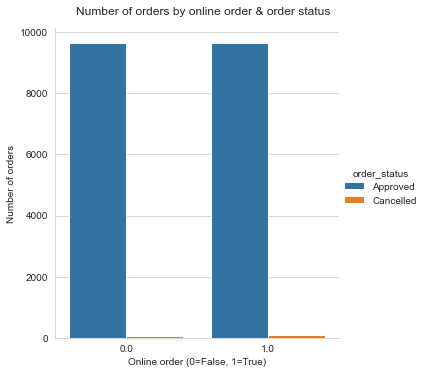

In [128]:
# Sử dụng seaborn và vẽ ra 5 chart khác nhau (column, line, box,...) với đầy đủ tên chart, tên các trục và chú thích.
# bar chart
sns.set_style('whitegrid')
m = sns.catplot(x='online_order', y='transaction_id', data=online_order_revenue, kind='bar', hue='order_status')
m.fig.suptitle('Number of orders by online order & order status', y=1.03)
m.set(xlabel='Online order (0=False, 1=True)',
      ylabel='Number of orders')
plt.show()

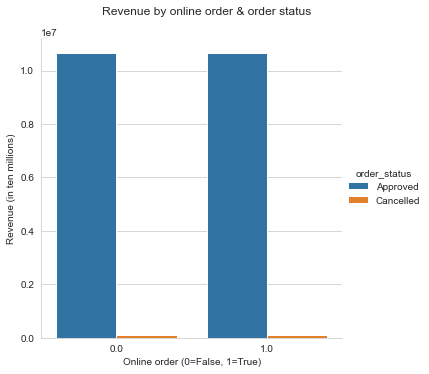

In [129]:
# bar chart
n = sns.catplot(x='online_order', y='list_price', data=online_order_revenue, kind='bar', hue='order_status')
n.fig.suptitle('Revenue by online order & order status', y=1.03)
n.set(xlabel='Online order (0=False, 1=True)',
      ylabel='Revenue (in ten millions)')
plt.show()

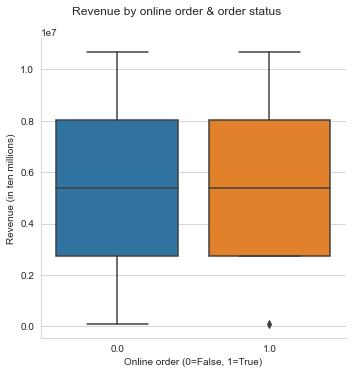

In [130]:
# Box chart
n = sns.catplot(x='online_order', y='list_price', data=online_order_revenue, kind='box', whis=0.5)
n.fig.suptitle('Revenue by online order & order status', y=1.03)
n.set(xlabel='Online order (0=False, 1=True)',
      ylabel='Revenue (in ten millions)')
plt.show()

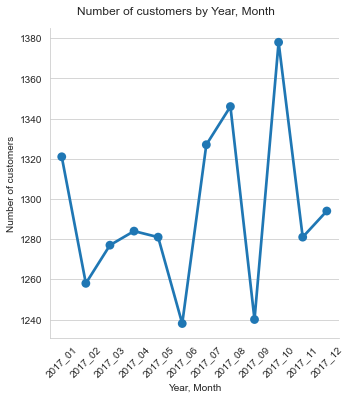

In [131]:
# point chart
g = sns.catplot(x='year_month',y='customer_id', data=customer, kind='point')
g.fig.suptitle('Number of customers by Year, Month', y=1.03)
g.set(xlabel='Year, Month',
      ylabel='Number of customers')
plt.xticks(rotation=45)
plt.show()

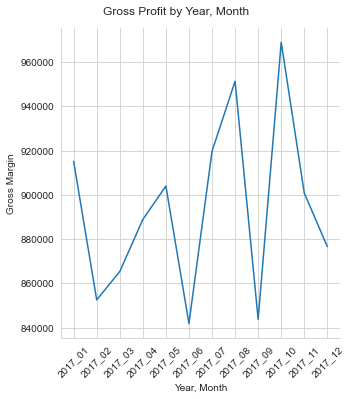

In [132]:
# line chart
g = sns.relplot(x='year_month',y='gross_margin', data=gross_margin, kind='line')
g.fig.suptitle('Gross Profit by Year, Month', y=1.03)
g.set(xlabel='Year, Month',
      ylabel='Gross Margin')
plt.xticks(rotation=45)
plt.show()